# Student information

Full name: Lại Khánh Toàn

Student ID: 19120689

# Preparation

## Download data

In [22]:
!wget https://raw.githubusercontent.com/ptpuyen1511/sna-lab03-twitter/master/tweets_data.json

--2022-11-09 07:00:54--  https://raw.githubusercontent.com/ptpuyen1511/sna-lab03-twitter/master/tweets_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22233690 (21M) [text/plain]
Saving to: ‘tweets_data.json’

tweets_data.json    100%[===================>]  21.20M  --.-KB/s    in 0.1s    

2022-11-09 07:00:54 (217 MB/s) - ‘tweets_data.json’ saved [22233690/22233690]



## Install necessary package

In [15]:
!pip install networkx==2.3
!pip install basemap-data
!pip install basemap-data-hires
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Lab 03

## Import necessary libraries and modules

In [16]:
#import: networkx (abbr: nx), pyplot (abbr: plt), pandas (abbr: pd), numpy (abbr: np)
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import: json, Basemap (from mpl_toolkits.basemap)
import json
from mpl_toolkits.basemap import Basemap 

%matplotlib inline

## Question 1:
Read data from the file provided (`tweets_data.json`) into the `DataFrame`.

Implement `flatten_tweets` function

In [25]:
def flatten_tweets(file_name):
    '''
    This function is used for flattening out tweet dictionaries so relevant json is in a top-level dictionary.

    ---Inputs:
        file_name:      str
                        The name of json file which includes tweets

    ---Return:
        list_tweets:    list[dict{}] (a list with elements are dict)
                        List of dicts, where dict is read from 1 line in json file (a tweet)

    '''

    tweets_json = open(file_name, 'r')
    list_tweets = []
    
    # Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name'] #TODO

        # Store the user screen name in 'user-location'
        tweet_obj['user-location'] = tweet_obj['user']['location'] #TODO
    
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj['extended_tweet-full_text'] = tweet_obj['extended_tweet']['full_text'] #TODO

        if 'quoted_status' in tweet_obj:
            # Store the quote user screen name in 'quoted_status-user-screen_name'
            tweet_obj['quoted_status-user-screen_name'] = tweet_obj['quoted_status']['user']['screen_name'] #TODO

            # Store the quote text in 'quoted_status-text'
            tweet_obj['quoted_status-text'] =  tweet_obj['quoted_status']['text'] #TODO

            # Store the extended quote text in 'quoted_status-extended_tweet-full_text'
            if 'extended_tweet' in tweet_obj['quoted_status']:
                tweet_obj['quoted_status-extended_tweet-full_text'] = tweet_obj['quoted_status']['extended_tweet']['full_text'] #TODO
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name'] #TODO

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text'] #TODO
            
            # Store the extended retweeted text in 'retweeted_status-extended_tweet-full_text'
            if 'extended_tweet' in tweet_obj['retweeted_status']:
                tweet_obj['retweeted_status-extended_tweet-full_text'] = tweet_obj['retweeted_status']['extended_tweet']['full_text'] #TODO
    
        list_tweets.append(tweet_obj)

    return list_tweets

Call `flatten_tweets` and create `df_tweets`

In [27]:
# Get list tweets from file
tweets = flatten_tweets('tweets_data.json')

# Create DataFrame from `tweets`
df_tweets = pd.DataFrame(tweets)

## Question 2:
Calculate the occurrence rate of the keywords `#sna`, `#datascience`, `#ai`  in all data provided on the file `tweets_data.json`

Hints: Implement a function that checks whether a word is in a tweet (for whole `DataFrame`)

In [28]:
def check_word_in_tweet(word, data):
    '''
    This function is used to check if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets, retweets and quoted tweets.

    ---Inputs:
        word:   str
                The keyword which we want to check.
        
        data:   pandas.core.frame.DataFrame
                The DataFrame we use to check keyword.

    ---Return:
        contains_column:    pandas.core.series.Series
                            A logical pandas Series. For each row, return True if the word appears and False if no
    '''
    contains_column = data['text'].str.contains(word, case = False) #TODO (Check in 'text')
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False) #TODO (Check in 'extended_tweet-full_text')
    contains_column |= data['quoted_status-text'].str.contains(word, case = False) #TODO (Check in 'quoted_status-text')
    contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word, case = False) #TODO (Check in 'quoted_status-extended_tweet-full_text')
    contains_column |= data['retweeted_status-text'].str.contains(word, case = False) #TODO (Check in 'retweeted_status-text')
    contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case = False) #TODO (Check in 'retweeted_status-extended_tweet-full_text')
    
    return contains_column

Call function and calculate occurrence rate

In [30]:
# Find mentions of #sna in all text fields
sna = check_word_in_tweet('#sna', df_tweets)

# Find mentions of #datascience in all text fields
ds = check_word_in_tweet('#datascience', df_tweets)

# Find mentions of #ai in all text fields
ai = check_word_in_tweet('#ai', df_tweets)

# Print proportion of tweets mentioning #sna
print("Proportion of #sna tweets:", np.sum(sna) / df_tweets.shape[0]) #TODO 

# Print proportion of tweets mentioning #datascience
print("Proportion of #datascience tweets:", np.sum(ds) / df_tweets.shape[0])#TODO

# Print proportion of tweets mentioning #ai
print("Proportion of #ai tweets:", np.sum(ai) / df_tweets.shape[0])#TODO

Proportion of #sna tweets: 0.0007833920877399138
Proportion of #datascience tweets: 0.22052487269878573
Proportion of #ai tweets: 0.90912651782217


## Question 3:
Create a graph of `G_rt` is a graph of the retweets network, `G_reply` is a graph of the replies network. Then, visualize the newly created graphs

### G_rt

Create `G_rt`

In [31]:
# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(df_tweets, source='user-screen_name', target='retweeted_status-user-screen_name', create_using=nx.DiGraph())

# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

Nodes in RT network: 1743
Edges in RT network: 2030


Visualize `G_rt`

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


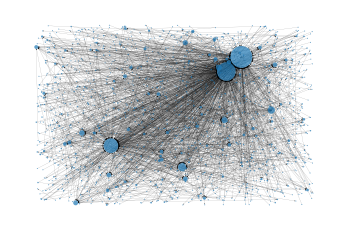

In [35]:
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, with_labels = False, node_size = sizes, width = 0.1, alpha = 0.7, arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off')
plt.show()

### G_reply

Create `G_reply`

In [32]:
# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(df_tweets, source='user-screen_name', target='in_reply_to_screen_name', create_using=nx.DiGraph())

# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

Nodes in reply network: 1519
Edges in reply network: 1512


Visualize `G_reply`

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


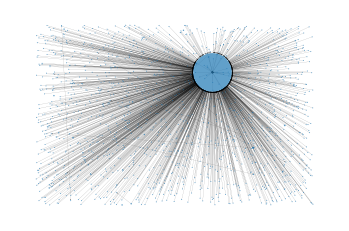

In [38]:
# Create random layout positions
pos = nx.random_layout(G_reply)

# Create size list
sizes2 = [x[1] for x in G_reply.degree()]

# Draw the network
nx.draw_networkx(G_reply, pos, with_labels = False, node_size = sizes2, width = 0.1, alpha = 0.7, arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off')
plt.show()

## Question 4:
Use the Basemap library to visualize locations that have tweet(s). *(You need to remove tweets with no location information)*

Hints:


*   First, remove tweets with no location info (create `df_tweets_has_location` `DataFrame`)
*   Secondly, implement `calculate_centroid(place)` function to calculate centroid of location from bounding box information
*   Next, set up the `Basemap` object with `projection='cyl'`, `llcrnrlon=-180.`, `llcrnrlat=-60.`, `urcrnrlon=180.`, `urcrnrlat=80.`
*   Finally, wrap all up and visualize it


Remove tweets with no location info (create `df_tweets_has_location` `DataFrame`)

In [43]:
# Filter rows with place column is not null
df_tweets_has_place = df_tweets.dropna(subset=['place'])

In [44]:
df_tweets.shape

(2553, 45)

In [45]:
df_tweets_has_place.shape

(18, 45)

Implement `calculate_centroid(place)` function to calculate centroid of location from bounding box information

In [47]:
def calculate_centroid(place):
    '''
    This function is used to calculate the centroid from a bounding box

    ---Inputs:
        place:  dict
                This is a column of DataFrame, which contains location info of tweets

    ---Outputs:
        (central_long, central_lat):    tuple(float, float)
                                        Where, central_long is the longtitude and central_lat is the latitude of central point.

    '''

    # Obtain the coordinates from the bounding box.
    coordinates = place['bounding_box']['coordinates'][0]

    # Get longtitude and latitude of all rows    
    longs = np.unique( [x[0] for x in coordinates] )
    lats  = np.unique( [x[1] for x in coordinates] )

    # Calculate central point longtitude and latitude
    if len(longs) == 1 and len(lats) == 1:
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        central_long = np.sum(longs) / 2
        central_lat  = np.sum(lats) / 2


    return (central_long, central_lat)

Set up the `m` (`Basemap` object) with `projection='cyl'`, `llcrnrlon=-180.`, `llcrnrlat=-60.`, `urcrnrlon=180.`, `urcrnrlat=80.`

In [56]:
boundingbox = [-180, -60, 184, 80] 

# Set up the Basemap object
m = Basemap(llcrnrlon = boundingbox[0],
            llcrnrlat = boundingbox[1],
            urcrnrlon = boundingbox[2],
            urcrnrlat = boundingbox[3],
            projection='cyl')

Wrap all up and visualize it

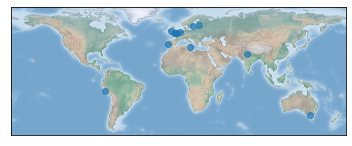

In [59]:
# Calculate the centroids for the dataset and isolate longitudue and latitudes
centroids = df_tweets_has_place['place'].apply(calculate_centroid)
lon = [x[0] for x in centroids]
lat = [x[1] for x in centroids]

# Draw continents, coastlines, countries, and states
# You can fill continents with white color but you will not get full score

m.shadedrelief()
# Draw the points and show the plot
m.scatter(lon, lat, latlon = True, alpha = 0.7)
plt.show()

---
<center>THE END</center>

